In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import os
for dirname, _, filenames in os.walk('./'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Financial.xlsx
./Financials Time Series.ipynb
./~$Financial.xlsx
./.ipynb_checkpoints\Financials Time Series-checkpoint.ipynb


In [3]:
df = pd.read_excel("./Financial.xlsx")
df.head()

,Segment,Country,Product,Discount Band,Units Sold,Manufacturing Price,Sale Price,Gross Sales,Discounts,Sales,COGS,Profit,Date,Month Number,Month Name,Year
0,Government,Canada,Carretera,NaN,1618.5,3,20,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1,January,2014
1,Government,Germany,Carretera,NaN,1321.0,3,20,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1,January,2014
2,Midmarket,France,Carretera,NaN,2178.0,3,15,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6,June,2014
3,Midmarket,Germany,Carretera,NaN,888.0,3,15,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6,June,2014
4,Midmarket,Mexico,Carretera,NaN,2470.0,3,15,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6,June,2014


17:29:49 - cmdstanpy - INFO - Chain [1] start processing
17:29:49 - cmdstanpy - INFO - Chain [1] done processing


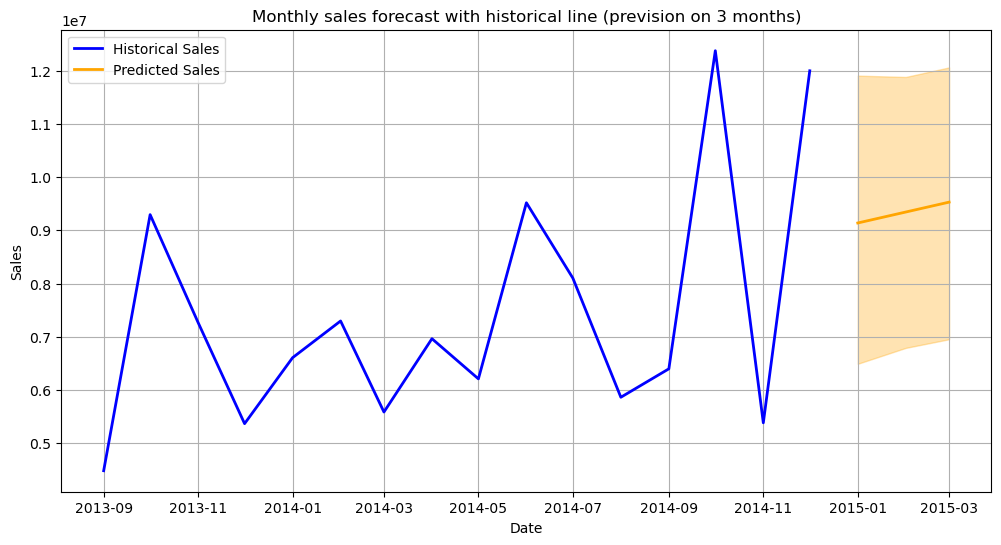

In [58]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# 🕒 Convertir la date si ce n'est pas déjà en datetime
df['Date'] = pd.to_datetime(df['Date'])

# 📊 Agréger les ventes mensuellement si nécessaire
df = df.groupby('Date').agg({' Sales': 'sum'}).reset_index()

# 👌 Renommer pour Prophet
df_prophet = df.rename(columns={'Date': 'ds', ' Sales': 'y'})

# 📈 Initialiser et entraîner le modèle
model = Prophet()
model.fit(df_prophet)

# 🔮 Créer un futur mensuel pour les 3 prochains mois
future = model.make_future_dataframe(periods=3, freq='MS')  # MS = Month Start
forecast = model.predict(future)

historique = df_prophet.set_index('ds')
previsions = forecast.set_index('ds')

# Date de fin des données historiques
dernier_jour = historique.index.max()

# Séparer les prévisions en 2 parties :
# - historique (déjà affiché)
# - futur (dates > dernier_jour)
previsions_futures = previsions[previsions.index > dernier_jour]

plt.figure(figsize=(12, 6))

# Tracer valeurs historiques (jusqu'à dernier jour)
plt.plot(historique.index, historique['y'], label='Historical Sales', color='blue', linewidth=2)

# Tracer seulement la partie future des prévisions
plt.plot(previsions_futures.index, previsions_futures['yhat'], label='Predicted Sales', color='orange', linewidth=2)

# Bande d'incertitude uniquement sur la partie future
plt.fill_between(previsions_futures.index,
                 previsions_futures['yhat_lower'],
                 previsions_futures['yhat_upper'],
                 color='orange', alpha=0.3)

plt.title('Monthly sales forecast with historical line (prevision on 3 months)')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

In [66]:
historique

,y
ds,
2013-09-01,4484000.03
2013-10-01,9295611.10
2013-11-01,7267203.30
2013-12-01,5368441.08
2014-01-01,6607761.68
2014-02-01,7297531.39
2014-03-01,5586859.87
2014-04-01,6964775.07
2014-05-01,6210211.06


In [62]:
previsions_futures

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
ds,,,,,,,,,,,,
2015-01-01,9.139010e+06,6.493366e+06,1.190772e+07,9.139010e+06,9.139010e+06,0.0,0.0,0.0,0.0,0.0,0.0,9.139010e+06
2015-02-01,9.344880e+06,6.791971e+06,1.188253e+07,9.344880e+06,9.344880e+06,0.0,0.0,0.0,0.0,0.0,0.0,9.344880e+06
2015-03-01,9.530828e+06,6.954650e+06,1.206242e+07,9.530828e+06,9.530828e+06,0.0,0.0,0.0,0.0,0.0,0.0,9.530828e+06
